In [2]:
import sympy as sp

# 构造方程组
pi0 = sp.Symbol('pi0')
pi1 = sp.Symbol('pi1')
p0cc = sp.Symbol('p_{0cc}')
p0cd = sp.Symbol('p_{0cd}')
p0dc = sp.Symbol('p_{0dc}')
p0dd = sp.Symbol('p_{0dd}')
p1cc = sp.Symbol('p_{1cc}')
p1cd = sp.Symbol('p_{1cd}')
p1dc = sp.Symbol('p_{1dc}')
p1dd = sp.Symbol('p_{1dd}')

c = sp.Symbol(r"c")
b = sp.Symbol(r"b")
beta = sp.Symbol(r"beta")
gamma = sp.Symbol(r"gamma")
lamda = sp.Symbol(r"lamda")

# 随机策略
## donor 的四种策略
d_c = sp.Symbol(r"d_{C}")
d_disc = sp.Symbol(r"d_{DISC}")
d_adisc = sp.Symbol(r"d_{ADISC}")
d_d = sp.Symbol(r"d_{D}")
## recipient 的四种策略
d_nr = sp.Symbol(r"d_{NR}")
d_ur = sp.Symbol(r"d_{UR}")
d_sr = sp.Symbol(r"d_{SR}")
d_ar = sp.Symbol(r"d_{AR}")



sp.init_printing()
pi0, pi1, p0cc, p0cd, p0dc, p0dd, p1cc, p1cd, p1dc, p1dd

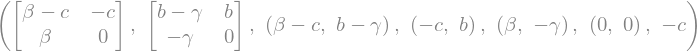

In [3]:
from typing import Literal

class Reward:
    """
        output the symbol reward matrix or the symbol expression of the element in the reward matrix

        init: 
            reward = Reward()

        example:
            case1: reward['do'], reward['re'] ... , return symbol matrix
            case2: reward['C', 'C'], reward['C', 'D'], reward['D', 'C'], reward['D', 'D'] ... , return binary tuple of symbol expression
            case3: reward['C', 'D', 'do'] ... , return symbol expression
    """
    def __init__(self) -> None:
        self.reward = list()
        self.reward.append(sp.Matrix(
            [[beta - c, -c],
                [beta, 0]]))
        self.reward.append(sp.Matrix(
            [[b - gamma, b],
             [-gamma, 0]]
        ))
    def get_reward(self, do_action: Literal['C', 'D'], re_action: Literal['C', 'D'], role: Literal['do', 're']) -> sp.Symbol:
        row = 0 if do_action == "C" else 1
        col = 0 if re_action == "C" else 1
        
        if role == "do": 
            return self.reward[0][row, col]
        else:
            return self.reward[1][row, col]

    def get_reward_mat(self, role: Literal['do', 're']) -> sp.Matrix:
        if role == "do":
            return self.reward[0]
        else:
            return self.reward[1]

    def get_reward_tuple(self, do_action: Literal['C', 'D'], re_action: Literal['C', 'D']) -> [sp.Symbol, sp.Symbol]:
        row = 0 if do_action == "C" else 1
        col = 0 if re_action == "C" else 1

        return (self.reward[0][row, col], self.reward[1][row, col])
    
    def __getitem__(self, keys):
        """
        output the symbol reward matrix or the symbol expression of the element in the reward matrix

        example:
            case1: rewardMat['do'], rewardMat['re'] ... , return symbol matrix
            case2: rewardMat['C', 'C'], rewardMat['C', 'D'], rewardMat['D', 'C'], rewardMat['D', 'D'] ... , return binary tuple of symbol expression
            case3: rewardMat['C', 'D', 'do'] ... , return symbol expression

        Args:
            keys (_type_): _description_

        Raises:
            KeyError: _description_

        Returns:
            Any: _description_
        """
        if isinstance(keys, str):
            assert keys in {'do', 're'}
            return self.get_reward_mat(keys)
        elif isinstance(keys, tuple):
            assert keys[0] in {'C', 'D'}
            assert keys[1] in {'C', 'D'}
            if len(keys) == 3:
                assert keys[2] in {'do', 're'}
                return self.get_reward(keys[0], keys[1], keys[2])
            elif len(keys) == 2:
                return self.get_reward_tuple(keys[0], keys[1])
        raise KeyError("Wrong key")

rewardMat = Reward()
rewardMat.get_reward_mat("donor")
sp.init_printing()
rewardMat['do'], rewardMat['re'], rewardMat['C', 'C'], rewardMat['C', 'D'], rewardMat['D', 'C'], rewardMat['D', 'D'], rewardMat['C', 'D', 'do']

In [4]:
subs_dict_for_TR = {
    sp.Symbol('T00'): p0cd + p0dc,
    # sp.Symbol('T01'): p0cc + p0dd,
    sp.Symbol('T01'): 1 - p0cd - p0dc,
    sp.Symbol('T10'): p1cd + p1dc,
    # sp.Symbol('T11'): p1cc + p1dd,
    sp.Symbol('T11'): 1 - p1cd - p1dc,
    sp.Symbol('R_0^{do}'): rewardMat['C', 'D', 'do'] * p0cd + rewardMat['D', 'C', 'do'] * p0dc + rewardMat['D', 'D', 'do'] * p0dd + rewardMat['C', 'C', 'do'] * p0cc,
    sp.Symbol('R_0^{re}'): rewardMat['C', 'D', 're'] * p0cd + rewardMat['D', 'C', 're'] * p0dc + rewardMat['D', 'D', 're'] * p0dd + rewardMat['C', 'C', 're'] * p0cc,
    sp.Symbol('R_1^{do}'): rewardMat['C', 'D', 'do'] * p1cd + rewardMat['D', 'C', 'do'] * p1dc + rewardMat['D', 'D', 'do'] * p1dd + rewardMat['C', 'C', 'do'] * p1cc,
    sp.Symbol('R_1^{re}'): rewardMat['C', 'D', 're'] * p1cd + rewardMat['D', 'C', 're'] * p1dc + rewardMat['D', 'D', 're'] * p1dd + rewardMat['C', 'C', 're'] * p1cc,
}

subs_dict_for_pi = {
    pi0: (p1cd + p1dc) / (p0dd + p0cc + p1cd + p1dc),
    pi1: (p0cc + p0dd) / (p0dd + p0cc + p1cd + p1dc),
}

subs_dict_for_p = {
    p0cc: (d_c + d_adisc) * (d_sr + d_ur),
    p0cd: (d_c + d_adisc) * (d_ar + d_nr),
    p0dc: (d_d + d_disc) * (d_ar + d_ur),
    p0dd: (d_d + d_disc) * (d_sr + d_nr),
    p1cc: (d_c + d_disc) * (d_sr + d_ur),
    p1cd: (d_c + d_disc) * (d_ar + d_nr),
    p1dc: (d_d + d_adisc) * (d_ar + d_ur),
    p1dd: (d_d + d_adisc) * (d_sr + d_nr),
}

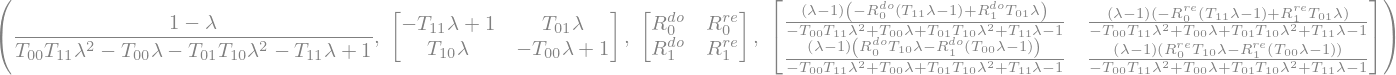

In [5]:
# 推广到metagame
# 使用sp进行矩阵解析式的推导
# use sp to derive the matrix expression

E = sp.eye(2)

T = sp.Matrix([[sp.Symbol('T00'), sp.Symbol('T01')],
                  [sp.Symbol('T10'), sp.Symbol('T11')]])

lamda = sp.Symbol("lamda")
temp_mat = E - lamda * T
temp_mat = temp_mat.inv()

# 提取公因子化简temp_mat
# extract the common factor to simplify temp_mat
gcd = sp.gcd(temp_mat[0, 0], temp_mat[0, 1])
temp_mat = temp_mat / gcd
gcd  = (1 - lamda) * gcd

R = sp.Matrix([[sp.Symbol('R_0^{do}'), sp.Symbol('R_0^{re}')], [sp.Symbol('R_1^{do}'), sp.Symbol('R_1^{re}')]])
# temp_mat * R

# result
# print(sp.latex(gcd))
# print(sp.latex(temp_mat))
# print(sp.latex(Ri))
expr = gcd * temp_mat * R
expr = sp.simplify(expr)
sp.init_printing()
gcd, temp_mat, R, expr
# , gcd.subs

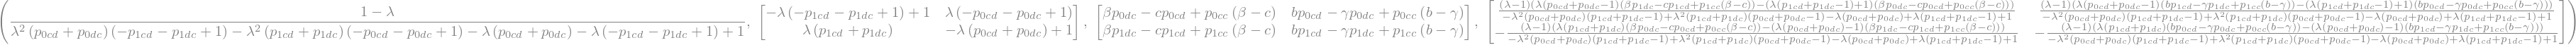

In [6]:
# 该方法是针对 norm9 特异的情况
# 将 T00, T01, T10, T11 替换为具体的值

gcd = gcd.subs(subs_dict_for_TR)
temp_mat = temp_mat.subs(subs_dict_for_TR)
R = R.subs(subs_dict_for_TR)
expr = expr.subs(subs_dict_for_TR)
expr = sp.simplify(expr)
gcd, temp_mat, R, expr

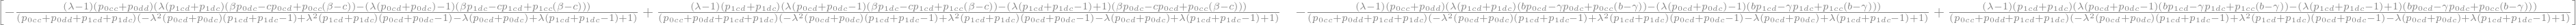

In [7]:
# 由稳态分布计算期望收益
res = sp.Matrix([[pi0, pi1]]) * expr

res = res.subs(subs_dict_for_pi)
# res = sp.simplify(res)
res

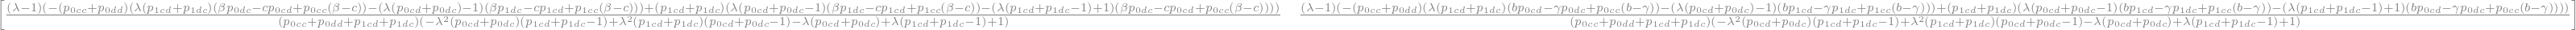

In [8]:
res = sp.simplify(res)
res

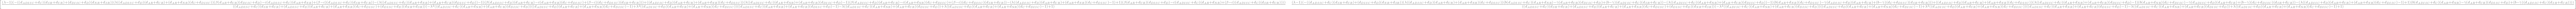

In [9]:
res = res.subs(subs_dict_for_p)
res_uni = res
res

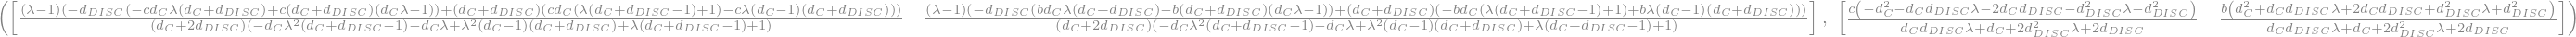

In [10]:
subs_dict_for_d = {
    # d_c: 0,
    # d_disc: 0,
    d_adisc: 0,
    d_d: 0,
    d_nr: 1,
    d_sr: 0,
    d_ar: 0,
    d_ur: 0
}
res_copy = res_uni.copy()
temp_res = res_uni.subs(subs_dict_for_d)
temp_res_render = temp_res.simplify()
temp_res,temp_res_render
# temp_res = temp_res.simplify()
# temp_res

In [11]:
# 带入具体的d值对比纯策略，验证结果
keys = [d_c, d_disc, d_adisc, d_d, d_nr, d_sr, d_ar, d_ur]

donor_values_ls = {}
for i, key in enumerate(['C', 'DISC', 'ADISC', 'D']):
    # 4 个 0
    temp_ls = [0] * 4
    temp_ls[i] = 1
    donor_values_ls[key] = temp_ls

recipient_values_ls = {}
for i, key in enumerate(['NR', 'SR', 'AR', 'UR']):
    # 4 个 0
    temp_ls = [0] * 4
    temp_ls[i] = 1
    recipient_values_ls[key] = temp_ls

subs_dict_ls = {}
for i in ['C', 'DISC', 'ADISC', 'D']:
    for j in ['NR', 'SR', 'AR', 'UR']:
        subs_dict_ls[i, j] = dict(zip(keys, donor_values_ls[i] + recipient_values_ls[j]))

subs_dict_ls

{('C', 'NR'): {d_{C}: 1,
  d_{DISC}: 0,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 1,
  d_{SR}: 0,
  d_{AR}: 0,
  d_{UR}: 0},
 ('C', 'SR'): {d_{C}: 1,
  d_{DISC}: 0,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 1,
  d_{AR}: 0,
  d_{UR}: 0},
 ('C', 'AR'): {d_{C}: 1,
  d_{DISC}: 0,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 0,
  d_{AR}: 1,
  d_{UR}: 0},
 ('C', 'UR'): {d_{C}: 1,
  d_{DISC}: 0,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 0,
  d_{AR}: 0,
  d_{UR}: 1},
 ('DISC', 'NR'): {d_{C}: 0,
  d_{DISC}: 1,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 1,
  d_{SR}: 0,
  d_{AR}: 0,
  d_{UR}: 0},
 ('DISC', 'SR'): {d_{C}: 0,
  d_{DISC}: 1,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 1,
  d_{AR}: 0,
  d_{UR}: 0},
 ('DISC', 'AR'): {d_{C}: 0,
  d_{DISC}: 1,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 0,
  d_{AR}: 1,
  d_{UR}: 0},
 ('DISC', 'UR'): {d_{C}: 0,
  d_{DISC}: 1,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 0,
  d_{AR}: 0,
  d_{UR}: 1},
 ('ADISC', 'NR'): {d

In [12]:
res_ls = []
for i in ['C', 'DISC', 'ADISC', 'D']:
    for j in ['NR', 'SR', 'AR', 'UR']:
        res_ls.append(res.subs(subs_dict_ls[i, j]).simplify())
temp_tuple = tuple(res_ls)
temp_tuple

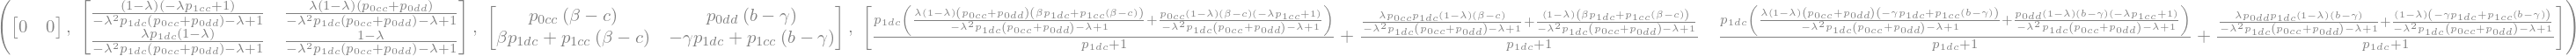

In [13]:
# 验证 sr - disc, ndisc 时的结果 符合可加性
temp = (1 - lamda) / ((1 - lamda) - lamda ** 2 * (p0cc + p0dd) * p1dc) * sp.Matrix([[1-p1cc * lamda, (p0cc + p0dd) * lamda], [p1dc * lamda, 1]])
temp_r = sp.Matrix([[(beta-c) * p0cc, (b-gamma) * p0dd], [beta * p1dc + (beta - c) * p1cc, -gamma*p1dc + (b - gamma) * p1cc]])
temp_v = temp * temp_r
temp_v = p1dc / (1 + p1dc) * temp_v[0, :] + 1 / (1 + p1dc) * temp_v[1, :]
sp.init_printing()
res = temp_v.subs(subs_dict_for_p)
res = res.subs(subs_dict_for_d)
res, temp, temp_r, temp_v

# social norm

## generalization of deterministic social norm and social norm considering error rate

我们模型中采用的最初的 social norm，对声誉的评估是确定性的，而许多其他研究考虑到声誉评估可能出错的情况，因此引入了错误率，可以用来研究 social norm 的抗干扰性。良好的 social norm 不会因为少数的错误评价而导致合作的崩溃。


The social norm we used in our model is deterministic, while many other studies consider the possibility of error in reputation assessment, so the error rate is introduced, which can be used to study the anti-interference of social norms. A good social norm will not lead to the collapse of cooperation because of a few wrong evaluations.

original social norm:

| $do$'s action | C | C | D | D |
| --- | --- | --- | --- | --- |
| $re$'s action | C | D | C | D |
| $re$'s new reputation | $s_1$ | $s_2$ | $s_3$ | $s_4$ |

我们并不在确定性的 social norm 上添加错误率，而是考虑一种更普遍的情况，即用连续的概率分布来描述声誉评估的结果。这样，我们就可以用一个概率分布来描述声誉评估的结果，而不是一组确定的值，我们的分析将会是对确定性 social norm 和考虑错误率的 social norm 的泛化。

We do not add error rate on deterministic social norm, but consider a more general case, that is, use continuous probability distribution to describe the result of reputation assessment. In this way, we can use a probability distribution to describe the result of reputation assessment, rather than a set of deterministic values. Our analysis will be a generalization of deterministic social norm and social norm considering error rate.

## continuous social norm:

| $do$'s action | C | C | D | D |
| --- | --- | --- | --- | --- |
| $re$'s action | C | D | C | D |
| $re$'s new reputation is 1| $p_{cc1}$ | $p_{cd1}$ | $p_{dc1}$ | $p_{dd1}$ |
| $re$'s new reputation is 0| $p_{cc0}$ | $p_{cd0}$ | $p_{dc0}$ | $p_{dd0}$ |

这里的 $p_{cc1}, p_{cd1}, p_{dc1}, p_{dd1}, p_{cc0}, p_{cd0}, p_{dc0}, p_{dd0} \in [0, 1]$，且

Here, $p_{cc1}, p_{cd1}, p_{dc1}, p_{dd1}, p_{cc0}, p_{cd0}, p_{dc0}, p_{dd0} \in [0, 1]$, and

$$
\begin{align}
\begin{cases}
p_{cc1} + p_{cc0} &= 1 \\
p_{cd1} + p_{cd0} &= 1 \\
p_{dc1} + p_{dc0} &= 1 \\
p_{dd1} + p_{dd0} &= 1
\end{cases}
\end{align}
$$

deterministic social norm 是 continuous social norm 的特例，即：$p_{cc1}, p_{cd1}, p_{dc1}, p_{dd1}, p_{cc0}, p_{cd0}, p_{dc0}, p_{dd0} \in \{0, 1\}$

Deterministic social norm is a special case of continuous social norm, that is: $p_{cc1}, p_{cd1}, p_{dc1}, p_{dd1}, p_{cc0}, p_{cd0}, p_{dc0}, p_{dd0} \in \{0, 1\}$

norm9表示为：

norm9 can be expressed as:

| $do$'s action | C | C | D | D |
| --- | --- | --- | --- | --- |
| $re$'s action | C | D | C | D |
| $re$'s new reputation is 1| 1 | 0 | 0 | 1 |
| $re$'s new reputation is 0| 0 | 1 | 1 | 0 |

我们可以 deterministic social norm 情况下 $(s_1, s_2, s_3, s_4) \rightarrow (p_{cc1}, p_{cd1}, p_{dc1}, p_{dd1}, p_{cc0}, p_{cd0}, p_{dc0}, p_{dd0})$ 的映射关系：

The mapping relationship between $(s_1, s_2, s_3, s_4) \rightarrow (p_{cc1}, p_{cd1}, p_{dc1}, p_{dd1}, p_{cc0}, p_{cd0}, p_{dc0}, p_{dd0})$ under deterministic social norm is:

$$
\begin{align}
(p_{cc1}, p_{cd1}, p_{dc1}, p_{dd1}, p_{cc0}, p_{cd0}, p_{dc0}, p_{dd0}) = (s_1, s_2, s_3, s_4, 1-s_1, 1-s_2, 1-s_3, 1-s_4)
\end{align}
$$

<!-- TODO: 对于带有错误率的 social norm -->

continuous social norm 可以看作是不同 deterministic social norm 的线性组合，组合公式可以用 $p_{cc1}$ 等来表示：

continuous social norm can be regarded as a linear combination of different deterministic social norms, and the combination formula can be expressed by $p_{cc1}$, etc.:

用 $i, i \in  0 \leq j \leq 15 \land j \in Z$ 表示 social norm 的编号，线性组合为：

The code number of social norm is represented by $i, i \in  0 \leq j \leq 15 \land j \in Z$, and the linear combination is:

$$
\begin{align}
\sum_{i=0}^{15} k_i \cdot \begin{pmatrix} s_1^i \\ s_2^i \\ s_3^i \\ s_4^i \\ 1-s_1^i \\ 1-s_2^i \\ 1-s_3^i \\ 1-s_4^i \end{pmatrix} = \begin{pmatrix} p_{cc1} \\ p_{cd1} \\ p_{dc1} \\ p_{dd1} \\ p_{cc0} \\ p_{cd0} \\ p_{dc0} \\ p_{dd0} \end{pmatrix}
\end{align}
$$

$k_i$ 表示每种 deterministic social norm 的权重，$k_i \in [0, 1]$

$k_i$ represents the weight of each deterministic social norm, $k_i \in [0, 1]$

In [14]:
import sympy as sp

# 构造方程组
pi0 = sp.Symbol('pi0')
pi1 = sp.Symbol('pi1')

p0cc = sp.Symbol('p_{0cc}')
p0cd = sp.Symbol('p_{0cd}')
p0dc = sp.Symbol('p_{0dc}')
p0dd = sp.Symbol('p_{0dd}')
p1cc = sp.Symbol('p_{1cc}')
p1cd = sp.Symbol('p_{1cd}')
p1dc = sp.Symbol('p_{1dc}')
p1dd = sp.Symbol('p_{1dd}')

# continuous social norm
pcc0 = sp.Symbol('p_{cc0}')
pcd0 = sp.Symbol('p_{cd0}')
pdc0 = sp.Symbol('p_{dc0}')
pdd0 = sp.Symbol('p_{dd0}')
pcc1 = sp.Symbol('p_{cc1}')
pcd1 = sp.Symbol('p_{cd1}')
pdc1 = sp.Symbol('p_{dc1}')
pdd1 = sp.Symbol('p_{dd1}')

c = sp.Symbol(r"c")
b = sp.Symbol(r"b")
beta = sp.Symbol(r"beta")
gamma = sp.Symbol(r"gamma")
lamda = sp.Symbol(r"lamda")

# 随机策略
## donor 的四种策略
d_c = sp.Symbol(r"d_{C}")
d_disc = sp.Symbol(r"d_{DISC}")
d_adisc = sp.Symbol(r"d_{ADISC}")
d_d = sp.Symbol(r"d_{D}")
## recipient 的四种策略
d_nr = sp.Symbol(r"d_{NR}")
d_ur = sp.Symbol(r"d_{UR}")
d_sr = sp.Symbol(r"d_{SR}")
d_ar = sp.Symbol(r"d_{AR}")

sp.init_printing()
pi0, pi1, p0cc, p0cd, p0dc, p0dd, p1cc, p1cd, p1dc, p1dd, pcc0, pcd0, pdc0, pdd0, pcc1, pcd1, pdc1, pdd1

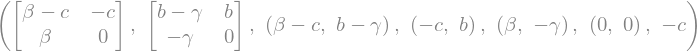

In [15]:
from typing import Literal

class Reward:
    """
        output the symbol reward matrix or the symbol expression of the element in the reward matrix

        init: 
            reward = Reward()

        example:
            case1: reward['do'], reward['re'] ... , return symbol matrix
            case2: reward['C', 'C'], reward['C', 'D'], reward['D', 'C'], reward['D', 'D'] ... , return binary tuple of symbol expression
            case3: reward['C', 'D', 'do'] ... , return symbol expression
    """
    def __init__(self) -> None:
        self.reward = list()
        self.reward.append(sp.Matrix(
            [[beta - c, -c],
                [beta, 0]]))
        self.reward.append(sp.Matrix(
            [[b - gamma, b],
             [-gamma, 0]]
        ))
    def get_reward(self, do_action: Literal['C', 'D'], re_action: Literal['C', 'D'], role: Literal['do', 're']) -> sp.Symbol:
        row = 0 if do_action == "C" else 1
        col = 0 if re_action == "C" else 1
        
        if role == "do": 
            return self.reward[0][row, col]
        else:
            return self.reward[1][row, col]

    def get_reward_mat(self, role: Literal['do', 're']) -> sp.Matrix:
        if role == "do":
            return self.reward[0]
        else:
            return self.reward[1]

    def get_reward_tuple(self, do_action: Literal['C', 'D'], re_action: Literal['C', 'D']) -> [sp.Symbol, sp.Symbol]:
        row = 0 if do_action == "C" else 1
        col = 0 if re_action == "C" else 1

        return (self.reward[0][row, col], self.reward[1][row, col])
    
    def __getitem__(self, keys):
        """
        output the symbol reward matrix or the symbol expression of the element in the reward matrix

        example:
            case1: rewardMat['do'], rewardMat['re'] ... , return symbol matrix
            case2: rewardMat['C', 'C'], rewardMat['C', 'D'], rewardMat['D', 'C'], rewardMat['D', 'D'] ... , return binary tuple of symbol expression
            case3: rewardMat['C', 'D', 'do'] ... , return symbol expression

        Args:
            keys (_type_): _description_

        Raises:
            KeyError: _description_

        Returns:
            Any: _description_
        """
        if isinstance(keys, str):
            assert keys in {'do', 're'}
            return self.get_reward_mat(keys)
        elif isinstance(keys, tuple):
            assert keys[0] in {'C', 'D'}
            assert keys[1] in {'C', 'D'}
            if len(keys) == 3:
                assert keys[2] in {'do', 're'}
                return self.get_reward(keys[0], keys[1], keys[2])
            elif len(keys) == 2:
                return self.get_reward_tuple(keys[0], keys[1])
        raise KeyError("Wrong key")

rewardMat = Reward()
rewardMat.get_reward_mat("donor")
sp.init_printing()
rewardMat['do'], rewardMat['re'], rewardMat['C', 'C'], rewardMat['C', 'D'], rewardMat['D', 'C'], rewardMat['D', 'D'], rewardMat['C', 'D', 'do']

In [16]:
subs_dict_for_TR = {
    sp.Symbol('T00'): p0dd*pdd0 + p0cc*pcc0 + p0cd*pcd0 + p0dc*pdc0,
    # sp.Symbol('T01'): p0cc + p0dd,
    sp.Symbol('T01'): 1 - (p0dd*pdd0 + p0cc*pcc0 + p0cd*pcd0 + p0dc*pdc0),
    sp.Symbol('T10'): p1dd*pdd0 + p1cc*pcc0 + p1cd*pcd0 + p1dc*pdc0,
    # sp.Symbol('T11'): p1cc + p1dd,
    sp.Symbol('T11'): 1 - (p1dd*pdd0 + p1cc*pcc0 + p1cd*pcd0 + p1dc*pdc0),
    sp.Symbol('R_0^{do}'): rewardMat['C', 'D', 'do'] * p0cd + rewardMat['D', 'C', 'do'] * p0dc + rewardMat['D', 'D', 'do'] * p0dd + rewardMat['C', 'C', 'do'] * p0cc,
    sp.Symbol('R_0^{re}'): rewardMat['C', 'D', 're'] * p0cd + rewardMat['D', 'C', 're'] * p0dc + rewardMat['D', 'D', 're'] * p0dd + rewardMat['C', 'C', 're'] * p0cc,
    sp.Symbol('R_1^{do}'): rewardMat['C', 'D', 'do'] * p1cd + rewardMat['D', 'C', 'do'] * p1dc + rewardMat['D', 'D', 'do'] * p1dd + rewardMat['C', 'C', 'do'] * p1cc,
    sp.Symbol('R_1^{re}'): rewardMat['C', 'D', 're'] * p1cd + rewardMat['D', 'C', 're'] * p1dc + rewardMat['D', 'D', 're'] * p1dd + rewardMat['C', 'C', 're'] * p1cc,
}

# norm9
## pi0: (p1cd + p1dc) / (p0dd + p0cc + p1cd + p1dc),
## pi1: (p0cc + p0dd) / (p0dd + p0cc + p1cd + p1dc),
subs_dict_for_pi = {
    # pi1: 1 - pi0
    pi0: (p1cc * pcc0 + p1cd * pcd0 + p1dc * pdc0 + p1dd * pdd0) / (p1cc * pcc0 + p1cd * pcd0 + p1dc * pdc0 + p1dd * pdd0 + p0cc * pcc1 + p0cd * pcd1 + p0dc * pdc1 + p0dd * pdd1),
    pi1: (p0cc*pcc1 + p0cd*pcd1 + p0dc*pdc1 + p0dd*pdd1) / (p1cc * pcc0 + p1cd * pcd0 + p1dc * pdc0 + p1dd * pdd0 + p0cc * pcc1 + p0cd * pcd1 + p0dc * pdc1 + p0dd * pdd1),
    # pi0: (p1cd + p1dc) / (p0dd + p0cc + p1cd + p1dc),
    # pi1: (p0cc + p0dd) / (p0dd + p0cc + p1cd + p1dc),
}

subs_dict_for_p = {
    p0cc: (d_c + d_adisc) * (d_sr + d_ur),
    p0cd: (d_c + d_adisc) * (d_ar + d_nr),
    p0dc: (d_d + d_disc) * (d_ar + d_ur),
    p0dd: (d_d + d_disc) * (d_sr + d_nr),
    p1cc: (d_c + d_disc) * (d_sr + d_ur),
    p1cd: (d_c + d_disc) * (d_ar + d_nr),
    p1dc: (d_d + d_adisc) * (d_ar + d_ur),
    p1dd: (d_d + d_adisc) * (d_sr + d_nr),
}

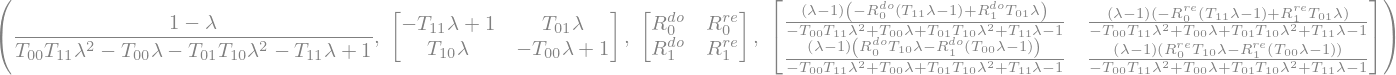

In [17]:
# 推广到metagame
# 使用sp进行矩阵解析式的推导
# use sp to derive the matrix expression

E = sp.eye(2)

T = sp.Matrix([[sp.Symbol('T00'), sp.Symbol('T01')],
                  [sp.Symbol('T10'), sp.Symbol('T11')]])

lamda = sp.Symbol("lamda")
temp_mat = E - lamda * T
temp_mat = temp_mat.inv()

# 提取公因子化简temp_mat
# extract the common factor to simplify temp_mat
gcd = sp.gcd(temp_mat[0, 0], temp_mat[0, 1])
temp_mat = temp_mat / gcd
gcd  = (1 - lamda) * gcd

R = sp.Matrix([[sp.Symbol('R_0^{do}'), sp.Symbol('R_0^{re}')], [sp.Symbol('R_1^{do}'), sp.Symbol('R_1^{re}')]])
# temp_mat * R

# result
# print(sp.latex(gcd))
# print(sp.latex(temp_mat))
# print(sp.latex(Ri))
expr = gcd * temp_mat * R
expr = sp.simplify(expr)
sp.init_printing()
gcd, temp_mat, R, expr
# , gcd.subs

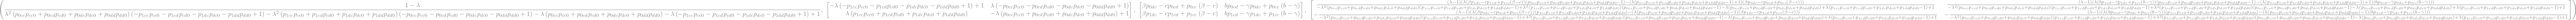

In [18]:
# 该方法是 continuous social norm 泛化情况
# 将 T00, T01, T10, T11 替换为具体的值

gcd = gcd.subs(subs_dict_for_TR)
temp_mat = temp_mat.subs(subs_dict_for_TR)
R = R.subs(subs_dict_for_TR)
expr = expr.subs(subs_dict_for_TR)
expr = sp.simplify(expr)
gcd, temp_mat, R, expr

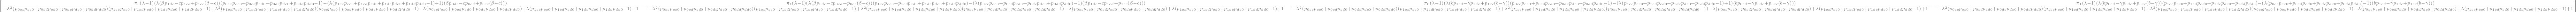

In [19]:
# 由稳态分布计算期望收益
res = sp.Matrix([[pi0, pi1]]) * expr

# res = res.subs(subs_dict_for_pi)
# res = sp.simplify(res)
res

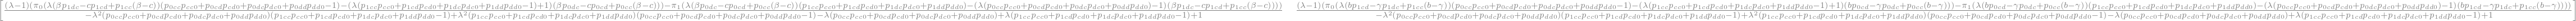

In [20]:
res = sp.simplify(res)
res

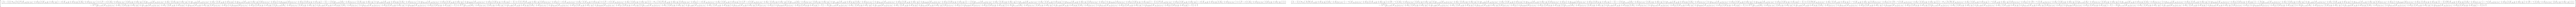

In [21]:
res = res.subs(subs_dict_for_p)
res

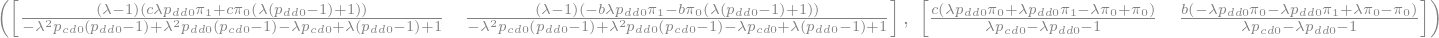

In [22]:
# 同 stochastic_stra-sr-disc-adisc.ipynb 中norm9的结果做对比
## NOTE: 经过验证，结果一致

res_uni = res.copy()

pcc1_value = 1
pcd1_value = 0
pdc1_value = 0
pdd1_value = 1

subs_dict_for_norm_p = {
    pcc1 : pcc1_value,
    pcd1 : pcd1_value,
    pdc1 : pdc1_value,
    pdd1 : pdd1_value,
    pcc0 : 1 - pcc1_value,
    pcd0 : 1 - pcd1_value,
    pdc0 : 1 - pdc1_value,
    pdd0 : 1 - pdd1_value,
}

subs_dict_for_d = {
    d_c: 0,
    d_disc: 0,
    d_adisc: 1,
    d_d: 0,
    d_nr: 1,
    d_sr: 0,
    d_ar: 0,
    d_ur: 0
}
temp_res = res_uni.subs(subs_dict_for_d)
# temp_res = temp_res.subs(subs_dict_for_norm_p)
temp_res_render = temp_res.simplify()
temp_res,temp_res_render
# temp_res = temp_res.simplify()
# temp_res

\left[\begin{matrix}\frac{\left(\lambda - 1\right) \left(\pi_{0} \left(\lambda \left(\beta \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) - c \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + \left(\beta - c\right) \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right)\right) \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) - \left(\lambda \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) + 1\right) \left(\beta \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) - c \left(d

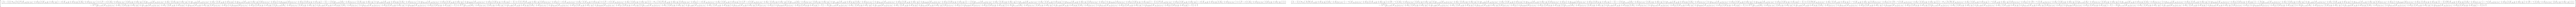

In [23]:
print(sp.latex(res))
res

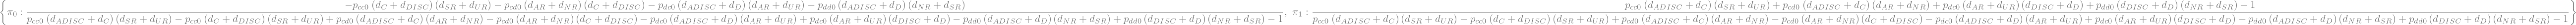

In [24]:
state = sp.Matrix([[pi0, pi1]])
eq1 = sp.Eq(state * T.subs(subs_dict_for_TR), state)
eq2 = sp.Eq(pi0 + pi1, 1)
solve = sp.solve([eq1, eq2], [pi0, pi1])
temp_solve = {pi0 : solve[pi0].subs(subs_dict_for_p), pi1: solve[pi1].subs(subs_dict_for_p)}
temp_solve

## result

至此，我们得到了一个公式，它能表示任意混合策略和任意 social norm 下的payoff，这个公式是：

So far, we have obtained a formula that can represent the payoff under any mixed strategy and any social norm. This formula is:

$$
\left[\begin{matrix}\frac{\left(\lambda - 1\right) \left(\pi_{0} \left(\lambda \left(\beta \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) - c \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + \left(\beta - c\right) \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right)\right) \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) - \left(\lambda \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) + 1\right) \left(\beta \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) - c \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + \left(\beta - c\right) \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right)\right)\right) - \pi_{1} \left(\lambda \left(\beta \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) - c \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + \left(\beta - c\right) \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right)\right) \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) - \left(\lambda \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) - 1\right) \left(\beta \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) - c \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + \left(\beta - c\right) \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right)\right)\right)\right)}{- \lambda^{2} \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) + \lambda^{2} \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) - \lambda \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) + \lambda \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) + 1} & \frac{\left(\lambda - 1\right) \left(\pi_{0} \left(\lambda \left(b \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) - \gamma \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + \left(b - \gamma\right) \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right)\right) \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) - \left(\lambda \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) + 1\right) \left(b \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) - \gamma \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + \left(b - \gamma\right) \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right)\right)\right) - \pi_{1} \left(\lambda \left(b \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) - \gamma \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + \left(b - \gamma\right) \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right)\right) \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) - \left(\lambda \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) - 1\right) \left(b \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) - \gamma \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + \left(b - \gamma\right) \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right)\right)\right)\right)}{- \lambda^{2} \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) + \lambda^{2} \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) - \lambda \left(p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)\right) + \lambda \left(p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) + p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1\right) + 1}\end{matrix}\right]

$$

公式中的 $\pi_0$，$\pi_1$ 是平稳分布中的声誉为 0 的概率和声誉为 1 的概率。

$\pi_0$ and $\pi_1$ in the formula are the probabilities of reputation 0 and reputation 1 in the stationary distribution.

$\displaystyle \left\{ \pi_{0} : \frac{- p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) - p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) - p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) - p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right)}{p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) - p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) - p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) - p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) - p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1}, \  \pi_{1} : \frac{p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1}{p_{cc0} \left(d_{ADISC} + d_{C}\right) \left(d_{SR} + d_{UR}\right) - p_{cc0} \left(d_{C} + d_{DISC}\right) \left(d_{SR} + d_{UR}\right) + p_{cd0} \left(d_{ADISC} + d_{C}\right) \left(d_{AR} + d_{NR}\right) - p_{cd0} \left(d_{AR} + d_{NR}\right) \left(d_{C} + d_{DISC}\right) - p_{dc0} \left(d_{ADISC} + d_{D}\right) \left(d_{AR} + d_{UR}\right) + p_{dc0} \left(d_{AR} + d_{UR}\right) \left(d_{DISC} + d_{D}\right) - p_{dd0} \left(d_{ADISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) + p_{dd0} \left(d_{DISC} + d_{D}\right) \left(d_{NR} + d_{SR}\right) - 1}\right\}$
<!-- TODO: 这里的公式太长如何化简 -->

但是 payoff 的解析解太长了，我们暂时将视角局限在纯策略上。

But analytical solution of payoff is too long, so we will temporarily limit our perspective to pure strategies.

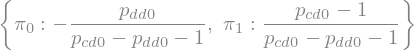

In [25]:
# 计算平稳分布
def get_stable_pi_subs_dict(subs_dict_for_d: dict, subs_dict_for_p: dict=None) -> dict:
    """
    stable_pi is determined by specific norm and specific strategy

    Args:
        subs_dict_for_norm_p (dict): 特定norm的带入值, dict of specific norm
        subs_dict_for_d (dict): 特定策略的带入值, dict of specific strategy
    Returns:
        dict: subs_dict_for_pi_stable
    """
    if subs_dict_for_p == None:
        subs_dict_for_p = {
            p0cc: (d_c + d_adisc) * (d_sr + d_ur),
            p0cd: (d_c + d_adisc) * (d_ar + d_nr),
            p0dc: (d_d + d_disc) * (d_ar + d_ur),
            p0dd: (d_d + d_disc) * (d_sr + d_nr),
            p1cc: (d_c + d_disc) * (d_sr + d_ur),
            p1cd: (d_c + d_disc) * (d_ar + d_nr),
            p1dc: (d_d + d_adisc) * (d_ar + d_ur),
            p1dd: (d_d + d_adisc) * (d_sr + d_nr),
        }

    state = sp.Matrix([[pi0, pi1]])
    eq1 = sp.Eq(state * T.subs(subs_dict_for_TR), state)
    eq2 = sp.Eq(pi0 + pi1, 1)
    solve = sp.solve([eq1, eq2], [pi0, pi1])

    numerator1, denominator1 = solve[pi0].as_numer_denom()
    numerator2, denominator2 = solve[pi1].as_numer_denom()

    numerator1 = numerator1.subs(subs_dict_for_d)
    denominator1 = denominator1.subs(subs_dict_for_d)
    numerator2 = numerator2.subs(subs_dict_for_d)
    denominator2 = denominator2.subs(subs_dict_for_d)
    
    # sympy 带值存在一个弊端，分子分母都为0的时候，有时会判为1，这里如果分母为0则应该为不存在平稳分布
    ## 另，根据手算的解析式，solve[0]和solve[1]的分母值相同，因此只判断一个就行
    if denominator1 == 0:
        print("no stable")
        p = sp.Symbol("p")
        # 不存在平稳分布应当保持原分布
        subs_dict_for_pi_stable = {
            pi0: 1 - p,
            pi1: p
        }
    else:
        subs_dict_for_pi_stable = {
            pi0: solve[pi0].subs(subs_dict_for_p).subs(subs_dict_for_d),
            pi1: solve[pi1].subs(subs_dict_for_p).subs(subs_dict_for_d)
        }
    return subs_dict_for_pi_stable


# 带入 pi0 和 pi1
pcc1_value = 1
pcd1_value = 0
pdc1_value = 0
pdd1_value = 1

subs_dict_for_norm_p = {
    pcc1 : pcc1_value,
    pcd1 : pcd1_value,
    pdc1 : pdc1_value,
    pdd1 : pdd1_value,
    pcc0 : 1 - pcc1_value,
    pcd0 : 1 - pcd1_value,
    pdc0 : 1 - pdc1_value,
    pdd0 : 1 - pdd1_value,
}

get_stable_pi_subs_dict(subs_dict_for_d)

In [26]:
# 带入具体的d值对比纯策略，验证结果，同时生成一个适用于任意 social norm 的通用 payoffMatrix
keys = [d_c, d_disc, d_adisc, d_d, d_nr, d_sr, d_ar, d_ur]

donor_values_ls = {}
for i, key in enumerate(['C', 'DISC', 'ADISC', 'D']):
    # 4 个 0
    temp_ls = [0] * 4
    temp_ls[i] = 1
    donor_values_ls[key] = temp_ls

recipient_values_ls = {}
for i, key in enumerate(['NR', 'SR', 'AR', 'UR']):
    # 4 个 0
    temp_ls = [0] * 4
    temp_ls[i] = 1
    recipient_values_ls[key] = temp_ls

subs_dict_ls = {}
for i in ['C', 'DISC', 'ADISC', 'D']:
    for j in ['NR', 'SR', 'AR', 'UR']:
        subs_dict_ls[i, j] = dict(zip(keys, donor_values_ls[i] + recipient_values_ls[j]))

subs_dict_ls

{('C', 'NR'): {d_{C}: 1,
  d_{DISC}: 0,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 1,
  d_{SR}: 0,
  d_{AR}: 0,
  d_{UR}: 0},
 ('C', 'SR'): {d_{C}: 1,
  d_{DISC}: 0,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 1,
  d_{AR}: 0,
  d_{UR}: 0},
 ('C', 'AR'): {d_{C}: 1,
  d_{DISC}: 0,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 0,
  d_{AR}: 1,
  d_{UR}: 0},
 ('C', 'UR'): {d_{C}: 1,
  d_{DISC}: 0,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 0,
  d_{AR}: 0,
  d_{UR}: 1},
 ('DISC', 'NR'): {d_{C}: 0,
  d_{DISC}: 1,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 1,
  d_{SR}: 0,
  d_{AR}: 0,
  d_{UR}: 0},
 ('DISC', 'SR'): {d_{C}: 0,
  d_{DISC}: 1,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 1,
  d_{AR}: 0,
  d_{UR}: 0},
 ('DISC', 'AR'): {d_{C}: 0,
  d_{DISC}: 1,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 0,
  d_{AR}: 1,
  d_{UR}: 0},
 ('DISC', 'UR'): {d_{C}: 0,
  d_{DISC}: 1,
  d_{ADISC}: 0,
  d_{D}: 0,
  d_{NR}: 0,
  d_{SR}: 0,
  d_{AR}: 0,
  d_{UR}: 1},
 ('ADISC', 'NR'): {d

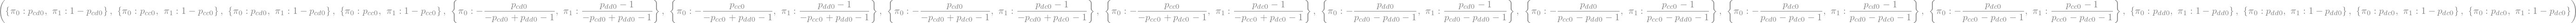

In [27]:
res_ls_stable_pi = []
for i in ['C', 'DISC', 'ADISC', 'D']:
    for j in ['NR', 'SR', 'AR', 'UR']:
        res_ls_stable_pi.append(get_stable_pi_subs_dict(subs_dict_ls[i,j]))
temp_tuple_stable_pi = tuple(res_ls_stable_pi)
temp_tuple_stable_pi

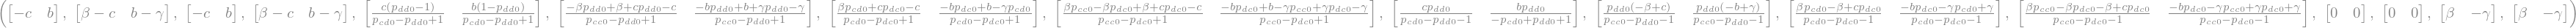

In [28]:
res_ls = []
for i in ['C', 'DISC', 'ADISC', 'D']:
    for j in ['NR', 'SR', 'AR', 'UR']:
        subs_dict_for_pi_stable = get_stable_pi_subs_dict(subs_dict_ls[i,j])
        res_ls.append(res.subs(subs_dict_ls[i, j]).subs(subs_dict_for_pi_stable).simplify())
temp_tuple = tuple(res_ls)
temp_tuple

## res2

<!-- TODO: translation -->

至此，我们获得了一个可以适用于任何连续 norm 的 payoffMatrix

Up to now, we get a generalized payoffMatrix which can describe all continuous norm

In [29]:
# 向通用 payoffMatrix 表带入 specific norm，验证结果
## 由于norm的种类决定了是否有稳态，因此具体代值的时候才能确定 pi的值
pcc1_value = 0
pcd1_value = 1
pdc1_value = 1
pdd1_value = 1

subs_dict_for_norm_p_norm_temp = {
    pcc1 : pcc1_value,
    pcd1 : pcd1_value,
    pdc1 : pdc1_value,
    pdd1 : pdd1_value,
    pcc0 : 1 - pcc1_value,
    pcd0 : 1 - pcd1_value,
    pdc0 : 1 - pdc1_value,
    pdd0 : 1 - pdd1_value,
}

copy_temp_tuple = temp_tuple

temp_tuple_specific_norm = tuple([i.subs(subs_dict_for_norm_p_norm_temp).simplify() for i in temp_tuple])
temp_tuple_specific_norm

In [30]:
import os
if not os.path.exists(r"./stochastic_stra-conti_social_norm"):
    os.mkdir(r"./stochastic_stra-conti_social_norm")

def tuple2md_lines(tuple, do_stg_names, re_stg_names):
    """input the tuple of sympy expression, output the markdown table lines

    Args:
        tuple (_type_): input 16 matrix (one matrix contains 2 elements, such as (do's payoff, re's payoff))
        1: C-NR, 2: C-SR, 3: C-AR, 4: C-UR, 5: DISC-NR, 6: DISC-SR, 7: DISC-AR, 8: DISC-UR, 9: ADISC-NR, 10: ADISC-SR, 11: ADISC-AR, 12: ADISC-UR, 13: D-NR, 14: D-SR, 15: D-AR, 16: D-UR
    """
    latex_values = []
    latex_values_lines = []
    k = 0
    for i in tuple:
        k += 1
        do_expr = i[0]
        re_expr = i[1]
        latex_values_lines.append(f"${sp.latex(do_expr)}, \ {sp.latex(re_expr)}$")
        if k % len(re_stg_names) == 0:
            latex_values.append(latex_values_lines)
            latex_values_lines = []

    MD_DELIM = "|"
    MD_LAYOUT = "---"
    md_lines = []
    md_header = MD_DELIM + "Donor Recipient" + MD_DELIM + MD_DELIM.join(re_stg_names) + MD_DELIM
    md_secend_header = MD_DELIM + (MD_LAYOUT + MD_DELIM) * (len(re_stg_names) + 1)
    md_lines.append(md_header)
    md_lines.append(md_secend_header)
    for i in range(len(do_stg_names)):
        line = MD_DELIM + do_stg_names[i] + MD_DELIM + MD_DELIM.join(latex_values[i]) + MD_DELIM
        md_lines.append(line)
    return md_lines

RE_STG_NAMES = ['NR', 'SR', 'AR', 'UR']
DO_STG_NAMES = ['C', 'DISC', 'ADISC', 'D']
md_lines = tuple2md_lines(temp_tuple, DO_STG_NAMES, RE_STG_NAMES)
file = open(f"./stochastic_stra-conti_social_norm/payoffMatrix.md", "w")
for line in md_lines:
    print(line)
    file.write(line + "\n")
file.write("\n")
file.close()

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \ b$|$\beta - c, \ b - \gamma$|$- c, \ b$|$\beta - c, \ b - \gamma$|
|DISC|$\frac{c \left(p_{dd0} - 1\right)}{p_{cd0} - p_{dd0} + 1}, \ \frac{b \left(1 - p_{dd0}\right)}{p_{cd0} - p_{dd0} + 1}$|$\frac{- \beta p_{dd0} + \beta + c p_{dd0} - c}{p_{cc0} - p_{dd0} + 1}, \ \frac{- b p_{dd0} + b + \gamma p_{dd0} - \gamma}{p_{cc0} - p_{dd0} + 1}$|$\frac{\beta p_{cd0} + c p_{dc0} - c}{p_{cd0} - p_{dc0} + 1}, \ \frac{- b p_{dc0} + b - \gamma p_{cd0}}{p_{cd0} - p_{dc0} + 1}$|$\frac{\beta p_{cc0} - \beta p_{dc0} + \beta + c p_{dc0} - c}{p_{cc0} - p_{dc0} + 1}, \ \frac{- b p_{dc0} + b - \gamma p_{cc0} + \gamma p_{dc0} - \gamma}{p_{cc0} - p_{dc0} + 1}$|
|ADISC|$\frac{c p_{dd0}}{p_{cd0} - p_{dd0} - 1}, \ \frac{b p_{dd0}}{- p_{cd0} + p_{dd0} + 1}$|$\frac{p_{dd0} \left(- \beta + c\right)}{p_{cc0} - p_{dd0} - 1}, \ \frac{p_{dd0} \left(- b + \gamma\right)}{p_{cc0} - p_{dd0} - 1}$|$\frac{\beta p_{cd0} - \beta + c p_{dc0}}{p_{cd0} - p_{dc0} - 1},

获得 payoff matrix 的通用表达式

The general expression of the payoff matrix is obtained:

<!-- TODO: translation -->
由于 norm 的种类决定了是否有稳态，因此具体代入 pi 值的时候才能确定 pi 的值

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \ b$|$\beta - c, \ b - \gamma$|$- c, \ b$|$\beta - c, \ b - \gamma$|
|DISC|$\frac{c \left(p_{dd0} - 1\right)}{p_{cd0} - p_{dd0} + 1}, \ \frac{b \left(1 - p_{dd0}\right)}{p_{cd0} - p_{dd0} + 1}$|$\frac{- \beta p_{dd0} + \beta + c p_{dd0} - c}{p_{cc0} - p_{dd0} + 1}, \ \frac{- b p_{dd0} + b + \gamma p_{dd0} - \gamma}{p_{cc0} - p_{dd0} + 1}$|$\frac{\beta p_{cd0} + c p_{dc0} - c}{p_{cd0} - p_{dc0} + 1}, \ \frac{- b p_{dc0} + b - \gamma p_{cd0}}{p_{cd0} - p_{dc0} + 1}$|$\frac{\beta p_{cc0} - \beta p_{dc0} + \beta + c p_{dc0} - c}{p_{cc0} - p_{dc0} + 1}, \ \frac{- b p_{dc0} + b - \gamma p_{cc0} + \gamma p_{dc0} - \gamma}{p_{cc0} - p_{dc0} + 1}$|
|ADISC|$\frac{c p_{dd0}}{p_{cd0} - p_{dd0} - 1}, \ \frac{b p_{dd0}}{- p_{cd0} + p_{dd0} + 1}$|$\frac{p_{dd0} \left(- \beta + c\right)}{p_{cc0} - p_{dd0} - 1}, \ \frac{p_{dd0} \left(- b + \gamma\right)}{p_{cc0} - p_{dd0} - 1}$|$\frac{\beta p_{cd0} - \beta + c p_{dc0}}{p_{cd0} - p_{dc0} - 1}, \ \frac{- b p_{dc0} - \gamma p_{cd0} + \gamma}{p_{cd0} - p_{dc0} - 1}$|$\frac{\beta p_{cc0} - \beta p_{dc0} - \beta + c p_{dc0}}{p_{cc0} - p_{dc0} - 1}, \ \frac{- b p_{dc0} - \gamma p_{cc0} + \gamma p_{dc0} + \gamma}{p_{cc0} - p_{dc0} - 1}$|
|D|$0, \ 0$|$0, \ 0$|$\beta, \ - \gamma$|$\beta, \ - \gamma$|


表中的 pi 表示如下

$$
\displaystyle \left\{ \pi_{0} : \frac{- p_{1cc} p_{cc0} - p_{1cd} p_{cd0} - p_{1dc} p_{dc0} - p_{1dd} p_{dd0}}{p_{0cc} p_{cc0} + p_{0cd} p_{cd0} + p_{0dc} p_{dc0} + p_{0dd} p_{dd0} - p_{1cc} p_{cc0} - p_{1cd} p_{cd0} - p_{1dc} p_{dc0} - p_{1dd} p_{dd0} - 1}, \  \pi_{1} : \frac{p_{0cc} p_{cc0} + p_{0cd} p_{cd0} + p_{0dc} p_{dc0} + p_{0dd} p_{dd0} - 1}{p_{0cc} p_{cc0} + p_{0cd} p_{cd0} + p_{0dc} p_{dc0} + p_{0dd} p_{dd0} - p_{1cc} p_{cc0} - p_{1cd} p_{cd0} - p_{1dc} p_{dc0} - p_{1dd} p_{dd0} - 1}\right\}
$$

当 pi 分母为零的时候 pi 取原始值

由上表，找 DISC-SR 均衡当：

$$
\begin{equation}
\begin{cases}
    p_{cc1} = 1 \\
    p_{dd0} \neq 1 \\ 
    \frac{p_{cd0}}{p_{cd0} - p_{dd0} + 1} \geqslant \frac{\gamma}{b} \\
    \frac{p_{cd0}}{1- p_{dc0}} \geqslant \frac{\gamma}{b} \wedge p_{dc0} \neq 1 \\
\end{cases}
\end{equation}
$$

这是理想情况下的结果，其假设前提：视为纯策略，但是存在一些入侵个体会带来扰动，从而产生吸收态让不改变初始策略分布的策略对无法持续。

当 DISC 所有行分母为 0 或不等式分母为 0 时，无需比较，DISC-SR 均衡一定存在 (分布为 0 对应是会被吸收的状态)

In [31]:
# 导出为 md
!jupyter nbconvert --to markdown ./stochastic_stra-conti_social_norm.ipynb

[NbConvertApp] Converting notebook ./stochastic_stra-conti_social_norm.ipynb to markdown
[NbConvertApp] Support files will be in stochastic_stra-conti_social_norm_files/
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] Making directory ./stochastic_stra-conti_social_norm_files
[NbConvertApp] M

In [32]:
# 向通用 payoffMatrix 表带入 specific norm，验证结果
pcc1_value = 1
pcd1_value = 0
pdc1_value = 0
pdd1_value = 1

subs_dict_for_norm_p_norm_temp = {
    pcc1 : pcc1_value,
    pcd1 : pcd1_value,
    pdc1 : pdc1_value,
    pdd1 : pdd1_value,
    pcc0 : 1 - pcc1_value,
    pcd0 : 1 - pcd1_value,
    pdc0 : 1 - pdc1_value,
    pdd0 : 1 - pdd1_value,
}

